In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Data Cleaning
# 1. Handle missing values
# Check for missing values
print(titanic.isnull().sum())

# Fill missing 'Age' values with the median age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing 'Embarked' values with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Drop the 'Cabin' column if it exists
if 'Cabin' in titanic.columns:
    titanic = titanic.drop(columns='Cabin')
# Verify that there are no more missing values
print(titanic.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [4]:
# 2. Correct data types (if necessary)
# The 'Survived' column should be a categorical variable
titanic['Survived'] = titanic['Survived'].astype('category')

# Exploratory Data Analysis (EDA)
# Summary statistics
print(titanic.describe(include='all'))

# Set the style for the plots
sns.set(style="whitegrid")

        PassengerId  Survived      Pclass                 Name   Sex  \
count    891.000000     891.0  891.000000                  891   891   
unique          NaN       2.0         NaN                  891     2   
top             NaN       0.0         NaN  Dooley, Mr. Patrick  male   
freq            NaN     549.0         NaN                    1   577   
mean     446.000000       NaN    2.308642                  NaN   NaN   
std      257.353842       NaN    0.836071                  NaN   NaN   
min        1.000000       NaN    1.000000                  NaN   NaN   
25%      223.500000       NaN    2.000000                  NaN   NaN   
50%      446.000000       NaN    3.000000                  NaN   NaN   
75%      668.500000       NaN    3.000000                  NaN   NaN   
max      891.000000       NaN    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   891.000000  891.000000  891.000000     891  891.00000

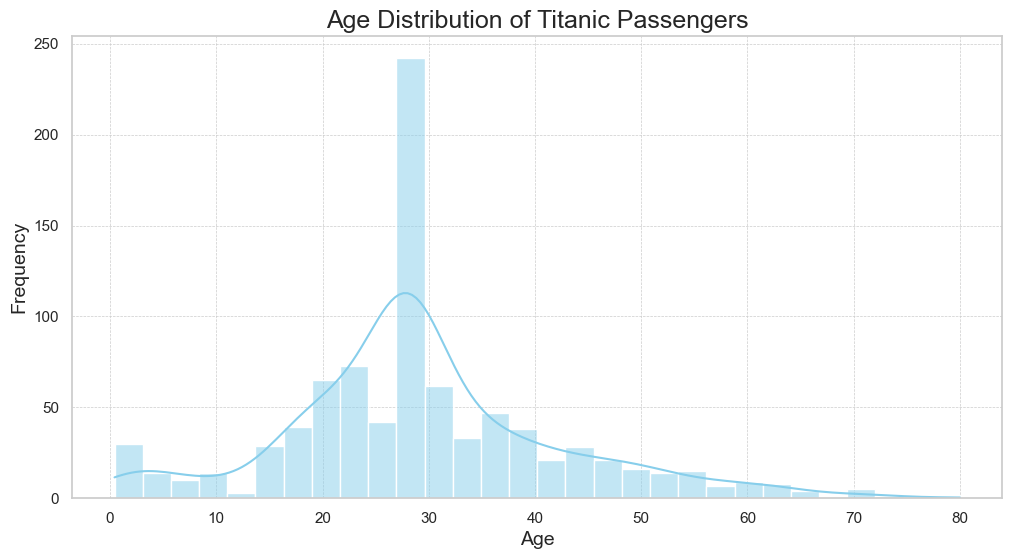

In [5]:
# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Titanic Passengers', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

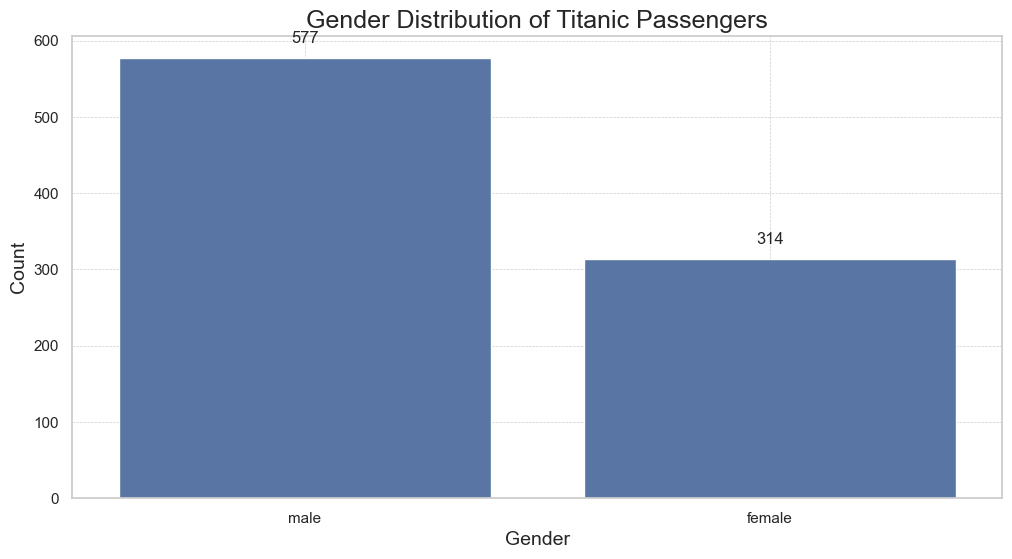

In [7]:
# Gender Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=titanic)
plt.title('Gender Distribution of Titanic Passengers', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for i, count in enumerate(titanic['Sex'].value_counts()):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)
plt.show()

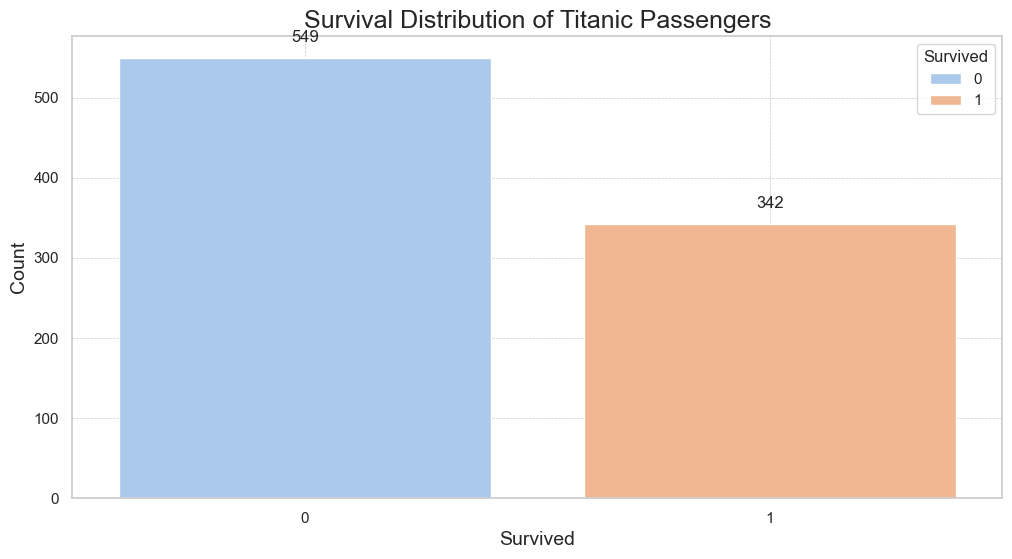

In [8]:
# Survival Distribution
plt.figure(figsize=(12, 6))
# Assign the 'hue' parameter to avoid the FutureWarning
sns.countplot(x='Survived', data=titanic, palette='pastel', hue='Survived')
plt.title('Survival Distribution of Titanic Passengers', fontsize=18)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for i, count in enumerate(titanic['Survived'].value_counts()):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)
plt.show()

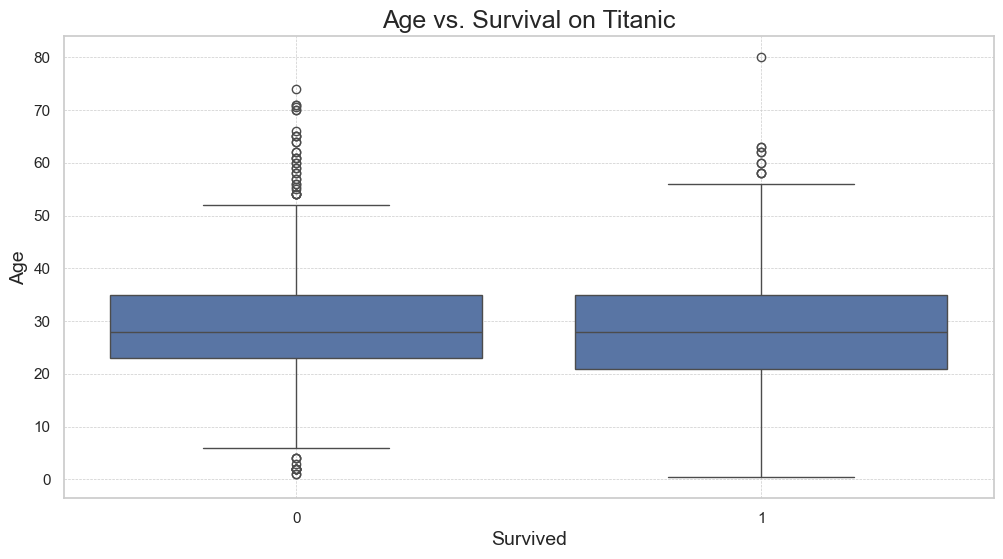

In [10]:
# Age vs. Survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs. Survival on Titanic', fontsize=18)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

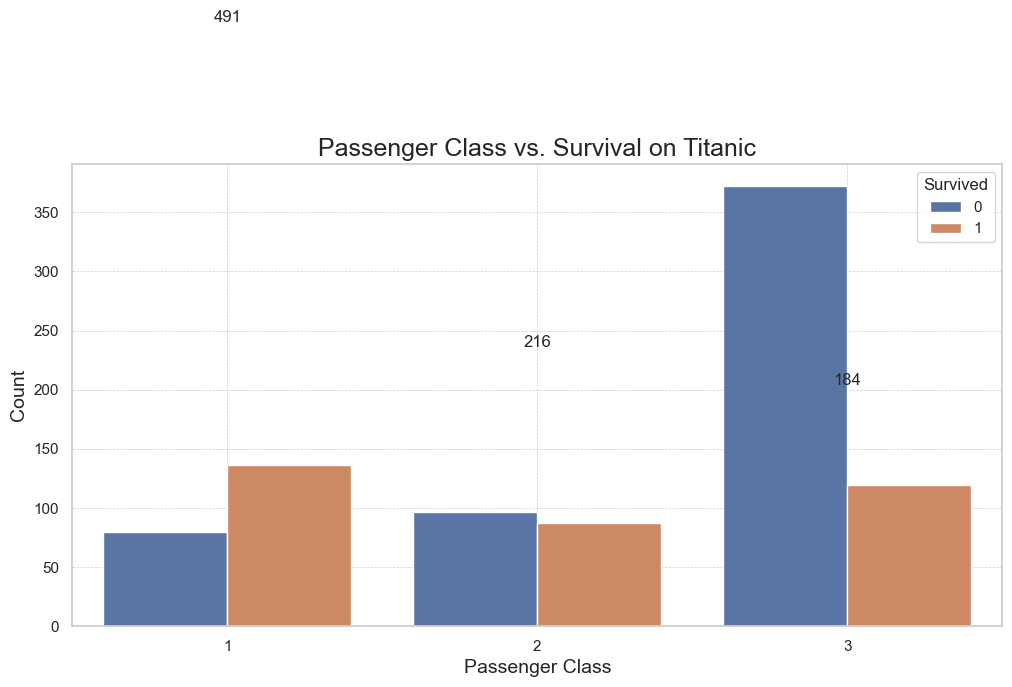

In [11]:
# Passenger Class vs. Survival
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Passenger Class vs. Survival on Titanic', fontsize=18)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for i, count in enumerate(titanic['Pclass'].value_counts()):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)
plt.show()

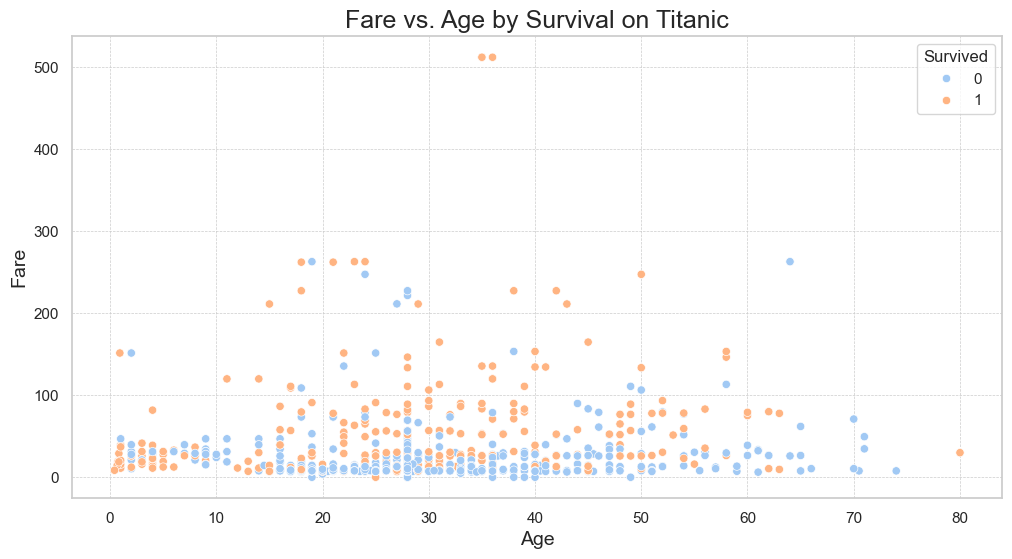

In [12]:
# Fare vs. Age by Survival
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic, palette='pastel')
plt.title('Fare vs. Age by Survival on Titanic', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()